## Russian License Plate Blurring

We will be using Haar Cascades to blur license plates detected in an image!

Russians are famous for having some of the most entertaining DashCam footage on the internet (I encourage you to Google Search "Russian DashCam"). Unfortunately a lot of the footage contains license plates, perhaps we could help out and create a license plat blurring tool?

OpenCV comes with a Russian license plate detector .xml file that we can use like other face detection files (unfortunately, it does not come with license detectors for other countries!)

### Import Necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

### Create a function to display images in larger size

In [2]:
def display(img):
    plt.figure(figsize=(6,8))
    plt.imshow(img)

### Read 'car.jpg' with cv2

In [3]:
car=cv2.imread('car.jpg')

### Display the image

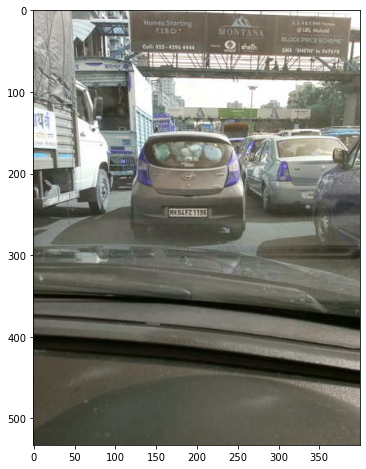

In [4]:
display(car)

### Convert to RGB

In [5]:
car=cv2.cvtColor(car, cv2.COLOR_BGR2RGB)

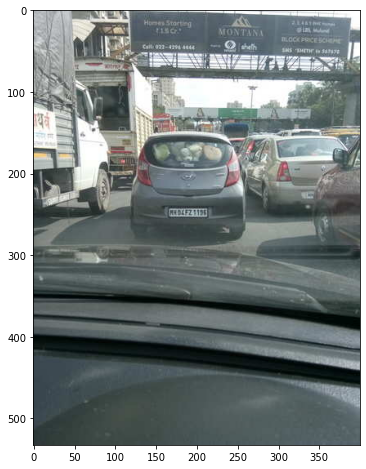

In [6]:
display(car)

### Load the 'haarcascade_russian_plate_number.xml' file.

In [7]:
plate_cascade=cv2.CascadeClassifier('haarcascade_russian_plate_number.xml')

We are creating a function that takes in an image and draws a rectangle around what it detects to be a license plate. We're just drawing a rectangle around it for now, later on we'll adjust this function to blur.

In [8]:
def plate(img):
    car_c=car.copy()
    plate_rect=plate_cascade.detectMultiScale(car_c,1.3,2)
    
    for x,y,w,h in plate_rect:
        cv2.rectangle(car_c,(x,y),(x+w,y+h),(0,0,255),3)
    return car_c

In [9]:
result=plate(car)

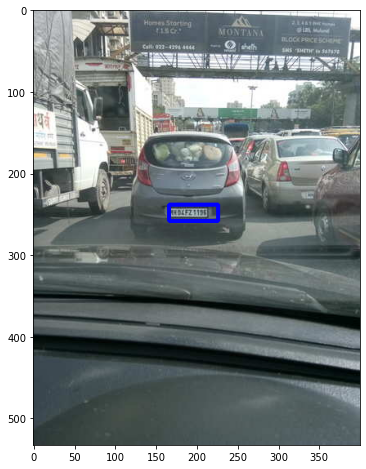

In [10]:
display(result)

### Blur licence plate

Edit the function so that is effectively blurs the detected plate, instead of just drawing a rectangle around it. Here are the steps you might want to take:**

1. The hardest part is converting the (x,y,w,h) information into the dimension values you need to grab an ROI. It's simply [Numpy Slicing](https://stackoverflow.com/questions/15589517/how-to-crop-an-image-in-opencv-using-python), you just need to convert the information about the top left corner of the rectangle and width and height, into indexing position values.
2. Once you've grabbed the ROI using the (x,y,w,h) values returned, you'll want to blur that ROI. You can use cv2.medianBlur for this.
3. Now that you have a blurred version of the ROI (the license plate) you will want to paste this blurred image back on to the original image at the same original location. Simply using Numpy indexing and slicing to reassign that area of the original image to the blurred roi.

In [11]:
car.shape

(533, 400, 3)

In [12]:
plate_cascade.detectMultiScale(car,1.3,2)

array([[166, 238,  60,  20]])

In [14]:
roi=car[238:238+20,166:166+60]

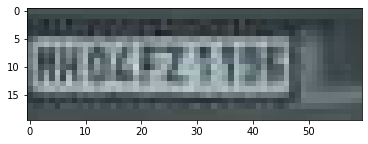

In [15]:
display(roi)

In [16]:
roi_blur=cv2.medianBlur(roi,ksize=9)

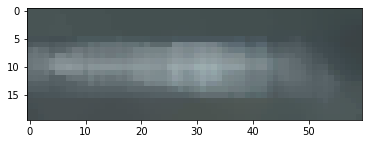

In [17]:
display(roi_blur)

In [18]:
car[238:238+20,166:166+60]=roi_blur

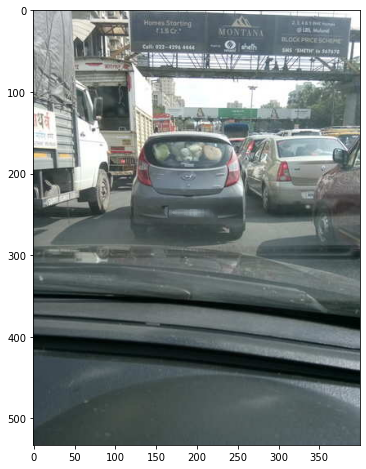

In [19]:
display(car)

## You will get the blurred Number plate as seen above